# 线性回归

## load data

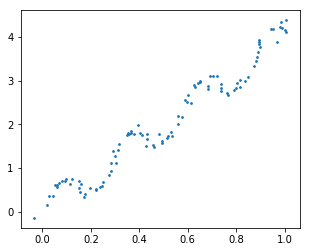

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X0=np.linspace(0,1,100)

np.random.seed(100)
X=X0+np.random.normal(X0)*0.02

Y=0.4*np.sin(X0*7*(np.pi) )+X*4

plt.figure(figsize=(5,4))
plt.scatter(X,Y, s=3)
plt.show()

In [2]:
dataX=[]
for i in range( len(X) ):
    dataX.append([X[i],1])
#
np.array(dataX).shape

(100, 2)

In [3]:
np.mat(Y).T.shape

(100, 1)

## 标准回归函数

In [4]:
def standRegres(xArr, yArr):
    X=np.mat(xArr)
    Y=np.mat(yArr).T
    xTx=X.T*X
    
    if np.linalg.det(xTx) == 0:
        print("This matrix is singular, cannot do inverse")
        return
    
    w=xTx.I * (X.T*Y)
    return w
# test
w=standRegres(dataX, Y)
w

matrix([[3.9979792 ],
        [0.03689268]])

> y=a*x+b = xT.w =[x 1].[a b]T

In [5]:
predY=np.mat(dataX)*w
yHat=predY.T.tolist()[0]
yHat[0:10]

[-0.10301784140354783,
 0.10548456122663062,
 0.21147154267171747,
 0.1402818999556566,
 0.28012388314179887,
 0.28396590673729777,
 0.301725917280031,
 0.2396715642249161,
 0.35127107682580855,
 0.4280041948667729]

## plot regY

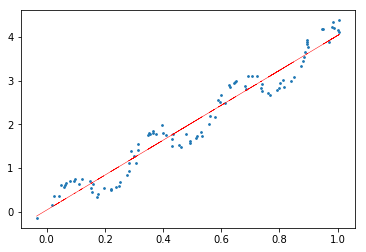

In [6]:
plt.scatter(X,Y,s=3)

#这样画拟合直线，可以看到有些地方粗细不一样，因为plot是连接点的，所以要对点排序
plt.plot(X, yHat, 'red', linewidth=0.5)
plt.show()

(100, 2)
(100, 1)


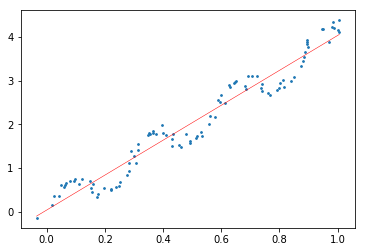

In [7]:
plt.scatter(X,Y,s=3)

# 画拟合后的曲线
Xcp=np.mat(dataX).copy() #1.复制x
print(Xcp.shape) #100 2
Xcp.sort(0) #2.对x排序
yHat=Xcp*w #3. 预测y
print(yHat.shape) #2 1
yHat=yHat.T.tolist()[0] #获得y一列

#画回归线
plt.plot(Xcp[:,0], yHat, 'red', linewidth=0.5) #粗细一致了
plt.show()

## 评价回归效果：相关系数

In [8]:
# 2个行向量的相关系数
np.corrcoef( (np.mat(dataX)*w).T,  np.mat(Y) ) #预测值, 真实值

array([[1.       , 0.9734068],
       [0.9734068, 1.       ]])

> 线性回归的常见问题是：欠拟合现象

# 局部加权线性回归

> 在模型中引入一些偏差，从而降低预测的均方误差。

## 局部加权线性回归 Locally Weighted Linear Regression, LWLR

In [72]:
# 给于附近的点一定的权重；
import numpy as np
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat=np.mat(xArr);
    yMat=np.mat(yArr).T;
    m=np.shape(xMat)[0]
    weights=np.mat(np.eye((m))) #创建对角矩阵，做权重矩阵
    
    # 计算权重
    for j in range(m):
        diffMat=testPoint - xMat[j, :]
        # 权重值以指数衰减
        weights[j,j]=np.exp(diffMat*diffMat.T/(-2*k**2) )
    
    xTx=xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return;
    
    ws=xTx.I * (xMat.T*(weights*yMat))
    return testPoint*ws;


#
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m=np.shape( testArr)[0]
    yHat=np.zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i], xArr, yArr, k)
    return yHat
# test：单点估计
lwlr(dataX[0], dataX, Y, 1.0 )

matrix([[-0.08634431]])

In [73]:
lwlr(dataX[0], dataX, Y, 0.02 )

matrix([[-0.14015998]])

## 对所有点估计

In [112]:
# 对所有点估计
yHat=lwlrTest(dataX, dataX, Y, 0.007)
print(yHat.shape)
yHat

(100,)


array([-0.13998491,  0.15737778,  0.39817247,  0.32249822,  0.59510212,
        0.6008564 ,  0.63216325,  0.51353383,  0.69599164,  0.71916543,
        0.71715138,  0.7435635 ,  0.66890407,  0.61766155,  0.54989891,
        0.58812329,  0.57332541,  0.54433453,  0.3832315 ,  0.38871518,
        0.56873356,  0.6209046 ,  0.50454795,  0.50160347,  0.65896148,
        0.83816152,  1.04053354,  1.27088492,  1.02295029,  1.24995619,
        1.45276136,  1.21724007,  1.48745128,  1.79120679,  1.80797227,
        1.78216656,  1.92615425,  1.77330293,  1.80723459,  1.80226315,
        1.84630826,  1.75724809,  1.71371826,  1.64506849,  1.73309557,
        1.5970522 ,  1.53164998,  1.60028873,  1.50726491,  1.77030704,
        1.60030553,  1.69358003,  1.7138    ,  1.78042593,  2.09217195,
        2.20978596,  2.10678159,  2.5736823 ,  2.57265832,  2.49684337,
        2.58740706,  2.87401551,  2.95131724,  2.98692528,  2.84773668,
        2.98323499,  3.03914373,  3.11216482,  3.08543146,  2.82

## 画图 k=0.007

In [117]:
# 排序
xMat=np.mat(dataX)
sortInd=xMat[:,0].argsort(0) #返回的是排序序号
print( sortInd.shape )
print( sortInd[1:10,] )
#
xSort=xMat[sortInd][:,0,:] #这个排序看不懂 //todo
print( xSort.shape )
xSort[1:10, :]

(100, 1)
[[ 1]
 [ 3]
 [ 2]
 [ 7]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [10]]
(100, 2)


matrix([[0.01715664, 1.        ],
        [0.02586037, 1.        ],
        [0.04366678, 1.        ],
        [0.05072035, 1.        ],
        [0.06083854, 1.        ],
        [0.06179953, 1.        ],
        [0.06624178, 1.        ],
        [0.07863433, 1.        ],
        [0.09386976, 1.        ]])

In [124]:
# test
print(xMat[sortInd].shape)
xMat[sortInd][1:10,:,:] #中间维度多余

(100, 1, 2)


matrix([[[0.01715664, 1.        ]],

        [[0.02586037, 1.        ]],

        [[0.04366678, 1.        ]],

        [[0.05072035, 1.        ]],

        [[0.06083854, 1.        ]],

        [[0.06179953, 1.        ]],

        [[0.06624178, 1.        ]],

        [[0.07863433, 1.        ]],

        [[0.09386976, 1.        ]]])

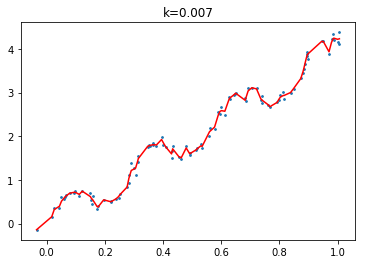

In [114]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

ax.scatter(X, Y, s=3)
ax.plot(xSort[:,0], yHat[sortInd], c='red')
#ax.scatter(xMat[:,0].flatten().A[0], np.mat(yHat).T.flatten().A[0], s=2, c='red')
plt.title('k=0.007')
plt.show()

## k=0.02 接近数据点的曲线

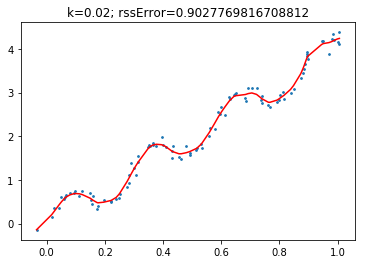

In [145]:
def test(k=0.007):
    yHat=lwlrTest(dataX, dataX, Y, k)
    
    #计算误差
    rssError= ( (Y-yHat.T)**2 ).sum()

    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.add_subplot(111)

    ax.scatter(X, Y, s=3)
    ax.plot(xSort[:,0], yHat[sortInd], c='red')
    #ax.scatter(xMat[:,0].flatten().A[0], np.mat(yHat).T.flatten().A[0], s=2, c='red')
    plt.title('k='+str(k)+"; rssError="+str(rssError) )
    plt.show()
# test
test(0.02)

## k=0.1 近直线

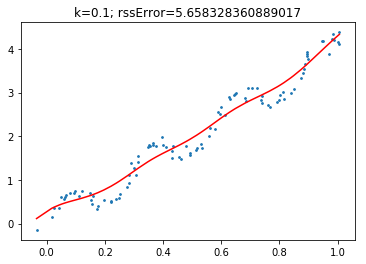

In [146]:
test(0.1)

## k=1 直线

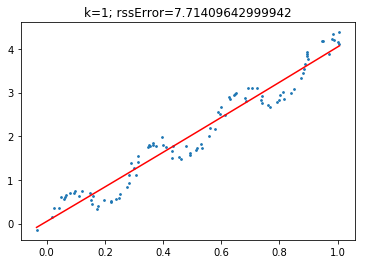

In [147]:
test(1)

## k就是N(mu, sigma^2)中的sigma

权重 核函数 w(i,i)=exp( -|x-xi|/(2*k^2) ), k是参数

> k相当于权重分散程度。
- k越小，正态分布越集中，只用周围的点拟合；
- k越大，正态分布越离散，几乎使用全部数据点拟合。